## Demo 
#### Week 2: Lecture 1

We want to understand how big data may still have bias. We will use randomization to simulate outcome of an election just like in Homework 1. 



If the details of the code don't make sense, then you should not worry about it because we will study these aspects of Python together throughout the semester. By Week 16, you should not only be able to run the Jupyter Notebook but you should be able to modify and extend it for your own work! Remember that 


- Python is one of many tools for data science. Don't get stuck on the specific of Python.
- We will work backwards from the examples to develop the programming tools 

In [1]:


import seaborn as sns
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(font_scale=2.5)

#### Roosevelt and Landon

The Literary Digest (popular magazine) predicted correct Presidential Elections in 1916, 1920, 1924, 1928, and 1932

In 1936:
- ~40 million voters expected.
- Literary Digest sent out 10 million mock ballots, received back 2.4 million! 
- Prediction: Landon 57%, Roosevelt 43%
- Actual result: Landon 38%, Roosevelt 62%

In [2]:
poll1936 = pd.read_csv("poll1936.csv")

In [3]:
poll1936

,source,who,percentage
0,poll,landon,57
1,poll,roosevelt,43
2,vote,landon,38
3,vote,roosevelt,62


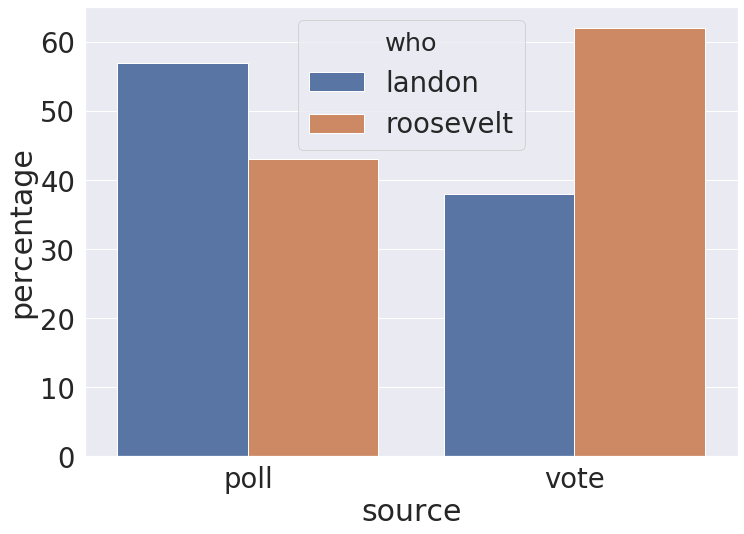

In [4]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.barplot(ax=ax, x="source", y="percentage", hue="who", data=poll1936);

A 1988 study showed there were two major flaws:
 - The 10 million voters who received mock ballots were not representative of the electorate.
 - Drawn from wealthier voters.
The 2.4 million who responded were not representative of those who received mock ballots.

More passionate voters more likely to respond.


#### Obama and Romney

Suppose we are trying to predict the presidential election in 2012. What should we prefer? (In 2012, there were 120 million voters.)
- An simple random sample of 400 individuals.
- An administrative (non-random) dataset of 60 million individuals (!) with a 1% bias



In [5]:
obama_true = 0.52 # Proportion of Obama support
obama_big = 0.5

srs_size = 400
big_size = 60000000
replications = 10000

def resample(size, prop, replications):
    return np.random.binomial(n=size, p=prop, size=replications) / size

srs_simulations = resample(srs_size, obama_true, replications)
big_simulations = resample(big_size, obama_big, replications)

In [6]:
srs_simulations[:5]*400

array([209., 219., 213., 173., 202.])

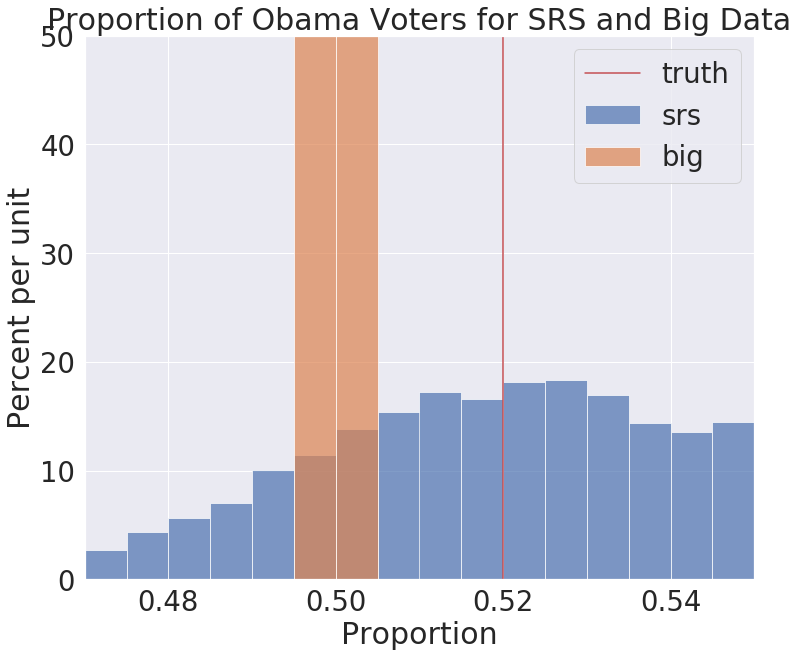

In [7]:
bins = bins=np.arange(0.47, 0.55, 0.005)
plt.figure(figsize=(12,10))
plt.hist(srs_simulations, bins=bins, alpha=0.7, normed=True, label='srs')
plt.hist(big_simulations, bins=bins, alpha=0.7, normed=True, label='big')

plt.title('Proportion of Obama Voters for SRS and Big Data')
plt.xlabel('Proportion')
plt.ylabel('Percent per unit')
plt.xlim(0.47, 0.55)
plt.ylim(0, 50)
plt.axvline(x=obama_true, color='r', label='truth')
plt.legend();

For non-random data, as the dataset size increases we get more certain about the wrong answer!